In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\LXL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h1>Load data</h1>

In [3]:
file_name = "iris.data.csv"

In [4]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
print(dataset.shape)

(150, 5)


<h1>Data preprocessing</h1>

In [5]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
lr = 0.1
num_iters = 100

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.zeros([1]), dtype=tf.float32)

<h2>Define update rule and accuracy</h2>

In [8]:
est = tf.add(tf.matmul(X, W), b)
out = tf.round(tf.nn.sigmoid(est))
err = y - out
accuracy = tf.reduce_mean(tf.cast(tf.equal(out, y), tf.float32))
dW = tf.matmul(tf.transpose(X), err)
db = tf.reduce_sum(err, 0)
W_ = W + lr * dW
b_ = b + lr * db
step = tf.group(W.assign(W_), b.assign(b_))
init = tf.global_variables_initializer()

The 1th epoch: accuracy is 0.96
The 11th epoch: accuracy is 1.00
The 21th epoch: accuracy is 1.00
The 31th epoch: accuracy is 1.00
The 41th epoch: accuracy is 1.00
The 51th epoch: accuracy is 1.00
The 61th epoch: accuracy is 1.00
The 71th epoch: accuracy is 1.00
The 81th epoch: accuracy is 1.00
The 91th epoch: accuracy is 1.00
The test accuracy is:  1.0


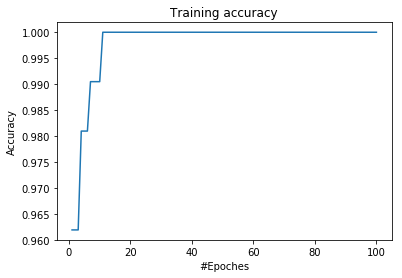

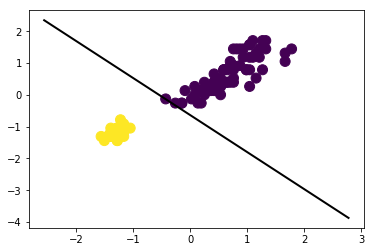

In [106]:
with tf.Session() as sess:
    sess.run(init)
    acc_li = []
    for i in range(num_iters):
        sess.run(step, feed_dict={X:x_train_1, y:y_train_1})
        acc = sess.run(accuracy, feed_dict={X:x_train_1, y:y_train_1})
        if i % 10 == 0:
           print("The "+str(i + 1)+"th epoch: accuracy is {:.2f}".format(acc))
        acc_li.append(acc)
    W_res = np.squeeze(sess.run(W))
    b_res = np.squeeze(sess.run(b))
    acc_test = sess.run(accuracy, feed_dict={X:x_test_1, y:y_test_1})
    print("The test accuracy is: ", acc_test)


fig1 = plt.figure()
plt.xlabel("#Epoches")
plt.ylabel("Accuracy")
plt.title("Training accuracy")
plt.plot(range(1, num_iters + 1), acc_li)

fig2 = plt.figure()
petal_len = x_train_1["petal_length"].values
petal_wid = x_train_1["petal_width"].values
min_x = np.min(petal_len) - 1
max_x = np.max(petal_len) + 1
plot_x = np.array([min_x, max_x])
plot_y = 1 / W_res[1] * (-W_res[0] * plot_x - b_res)
plt.scatter(petal_len, petal_wid, c=np.squeeze(y_train_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.show()

<h3>Analysis</h3>
<p>The test accuracy is 100%. Iris-setosa has smaller petal width and length than other flowers</p>

<h1>Part b:</h1>

In [9]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


The 1th epoch: accuracy is 0.71
The 11th epoch: accuracy is 0.96
The 21th epoch: accuracy is 0.96
The 31th epoch: accuracy is 0.96
The 41th epoch: accuracy is 0.96
The 51th epoch: accuracy is 0.96
The 61th epoch: accuracy is 0.96
The 71th epoch: accuracy is 0.96
The 81th epoch: accuracy is 0.96
The 91th epoch: accuracy is 0.96
The test accuracy is:  0.95555556


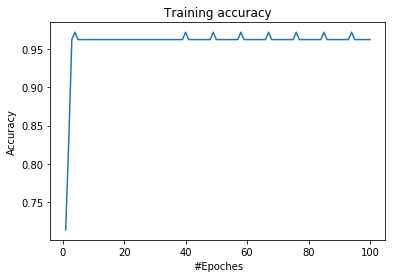

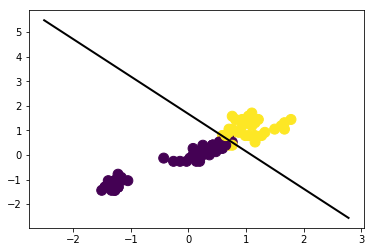

In [12]:
with tf.Session() as sess:
    sess.run(init)
    acc_li = []
    for i in range(num_iters):
        sess.run(step, feed_dict={X:x_train_2, y:y_train_2})
        acc = sess.run(accuracy, feed_dict={X:x_train_2, y:y_train_2})
        if i % 10 == 0:
           print("The "+str(i + 1)+"th epoch: accuracy is {:.2f}".format(acc))
        acc_li.append(acc)
    W_res = np.squeeze(sess.run(W))
    b_res = np.squeeze(sess.run(b))
    acc_test = sess.run(accuracy, feed_dict={X:x_test_2, y:y_test_2})
    print("The test accuracy is: ", acc_test)


fig1 = plt.figure()
plt.xlabel("#Epoches")
plt.ylabel("Accuracy")
plt.title("Training accuracy")
plt.plot(range(1, num_iters + 1), acc_li)

fig2 = plt.figure()
petal_len = x_train_2["petal_length"].values
petal_wid = x_train_2["petal_width"].values
min_x = np.min(petal_len) - 1
max_x = np.max(petal_len) + 1
plot_x = np.array([min_x, max_x])
plot_y = 1 / W_res[1] * (-W_res[0] * plot_x - b_res)
plt.scatter(petal_len, petal_wid, c=np.squeeze(y_train_2), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.show()

<h3>Analysis</h3>
<p>The test accuracy is 95.6%. Most virginica has larger petal width and length than non-virginica.</p>

<h1>Part c:</h1>

In [29]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [62]:
lr = 0.005
num_iter = 100
inp_size = 4
hidden_size_1 = 256
hidden_size_2 = 128
output_size = 3

<h2>Define placehoder and variables</h2>

In [63]:
tf.reset_default_graph()
#Placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, inp_size])
y = tf.placeholder(dtype=tf.float32, shape=[None, output_size])
#Variables
initializer = tf.contrib.layers.variance_scaling_initializer()
W1 = tf.Variable(initializer([inp_size, hidden_size_1]), dtype=tf.float32)
W2 = tf.Variable(initializer([hidden_size_1, hidden_size_2]), dtype=tf.float32)
W3 = tf.Variable(initializer([hidden_size_2, output_size]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([hidden_size_1]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([hidden_size_2]), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([output_size]), dtype=tf.float32)

<h2>Define the neural network</h2>

In [64]:
def neural_net(X):
    layer1_out = tf.nn.relu(tf.matmul(X, W1) + b1)
    layer2_out = tf.nn.relu(tf.matmul(layer1_out, W2) + b2)
    out = tf.nn.softmax(tf.matmul(layer2_out, W3) + b3)
    return out

<h2>Define cost function and accuracy</h2>

In [65]:
out = neural_net(X)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=out)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(out, 1), tf.argmax(y, 1)), dtype=tf.float32))
optimizer = tf.train.AdamOptimizer(lr)
train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [66]:
with tf.Session() as sess:
    sess.run(init)
    acc_list = []
    for i in range(num_iter):
        sess.run(train_op, feed_dict={X:x_train_3, y:y_train_3})
        acc = sess.run(accuracy, feed_dict={X:x_train_3, y:y_train_3})
        acc_list.append(acc)
        print("Accuracy at "+str(i+1)+"th epoch is: {:.2f}".format(acc))
    print("Training finished!")
    acc_test = sess.run(accuracy, feed_dict={X:x_test_3, y:y_test_3})
    print("The test accuracy is: ", acc_test)

Accuracy at 1th epoch is: 0.66
Accuracy at 2th epoch is: 0.83
Accuracy at 3th epoch is: 0.86
Accuracy at 4th epoch is: 0.87
Accuracy at 5th epoch is: 0.86
Accuracy at 6th epoch is: 0.86
Accuracy at 7th epoch is: 0.88
Accuracy at 8th epoch is: 0.89
Accuracy at 9th epoch is: 0.90
Accuracy at 10th epoch is: 0.90
Accuracy at 11th epoch is: 0.90
Accuracy at 12th epoch is: 0.91
Accuracy at 13th epoch is: 0.91
Accuracy at 14th epoch is: 0.92
Accuracy at 15th epoch is: 0.93
Accuracy at 16th epoch is: 0.93
Accuracy at 17th epoch is: 0.93
Accuracy at 18th epoch is: 0.93
Accuracy at 19th epoch is: 0.93
Accuracy at 20th epoch is: 0.93
Accuracy at 21th epoch is: 0.94
Accuracy at 22th epoch is: 0.94
Accuracy at 23th epoch is: 0.94
Accuracy at 24th epoch is: 0.94
Accuracy at 25th epoch is: 0.94
Accuracy at 26th epoch is: 0.94
Accuracy at 27th epoch is: 0.95
Accuracy at 28th epoch is: 0.96
Accuracy at 29th epoch is: 0.96
Accuracy at 30th epoch is: 0.97
Accuracy at 31th epoch is: 0.98
Accuracy at 32th 

<h2>Plot</h2>

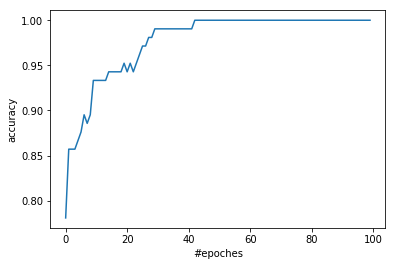

In [61]:
fig1 = plt.figure()
plt.xlabel("#epoches")
plt.ylabel("accuracy")
plt.plot(range(100), acc_list)
plt.show()